In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,silhouette_score

In [2]:
from tslearn_test import TSA64K

In [43]:
method = 'dtw'
num_clusters = 20

LMP_data = 'Example_LMP_test.csv'
dispatch_data = 'Example_dispatch_test.csv'

tsa_task = TSA64K(LMP_data,dispatch_data, method)
lmp_array, dispatch_array = tsa_task.read_data()
train_data = tsa_task.transform_data(lmp_array, dispatch_array)

sc,labels = tsa_task.cluster_data(train_data, num_clusters)

In [44]:
clusters = {}
for i, j in enumerate(labels):
    if j not in clusters:
        clusters[j] = {}
        clusters[j]['lmp'] = []
        clusters[j]['dispatch'] = []
        clusters[j]['lmp'].append(train_data[i][0])
        clusters[j]['dispatch'].append(train_data[i][1])
    else:
        clusters[j]['lmp'].append(train_data[i][0])
        clusters[j]['dispatch'].append(train_data[i][1])

In [47]:
cluster_results = str(num_clusters) + '_clusters.json'
# print(cluster_results)

with open(cluster_results, 'r') as f:
    cluster_results = json.load(f)
# print(cluster_results)

cen = np.array(cluster_results['model_params']['cluster_centers_'])
time_len = range(24)
# plt.plot(time_len,cen[0][0])
# plt.plot(time_len,cen[1][1])

In [48]:
def plot_results(num):
    f,(ax1,ax2) = plt.subplots(1,2,figsize = ((16,6)))
    for i,j in zip(clusters[num]['lmp'],clusters[num]['dispatch']):
        ax1.plot(time_len,i,'--',c='g', alpha=0.5)
        ax2.plot(time_len,j,'--',c='g', alpha=0.5)
    ax1.set_ylim(0,100)
    ax1.plot(time_len,cen[num][0], '-',c = 'r')
    ax1.set_ylabel('LMP($/MWh)')
    ax1.set_xlabel('Time(h)')
    ax2.set_ylabel('Dispatched Power(MW)')
    ax2.set_xlabel('Time(h)')
    plt.plot(time_len,cen[num][1], '-',c = 'r')
    plt.show()

    return print('The number of days in the cluster_{} is {}'.format(num,len(clusters[num]['lmp'])))

In [21]:
for i in clusters:
    print('The number of points in cluster_{} is {}'.format(i,len(clusters[i]['lmp'])))


The number of points in cluster_0 is 37
The number of points in cluster_14 is 18
The number of points in cluster_12 is 13
The number of points in cluster_10 is 114
The number of points in cluster_3 is 6
The number of points in cluster_18 is 23
The number of points in cluster_16 is 40
The number of points in cluster_15 is 31
The number of points in cluster_19 is 14
The number of points in cluster_1 is 9
The number of points in cluster_11 is 11
The number of points in cluster_6 is 1
The number of points in cluster_13 is 22
The number of points in cluster_17 is 18
The number of points in cluster_4 is 1
The number of points in cluster_5 is 1
The number of points in cluster_2 is 2
The number of points in cluster_8 is 1
The number of points in cluster_7 is 1
The number of points in cluster_9 is 1


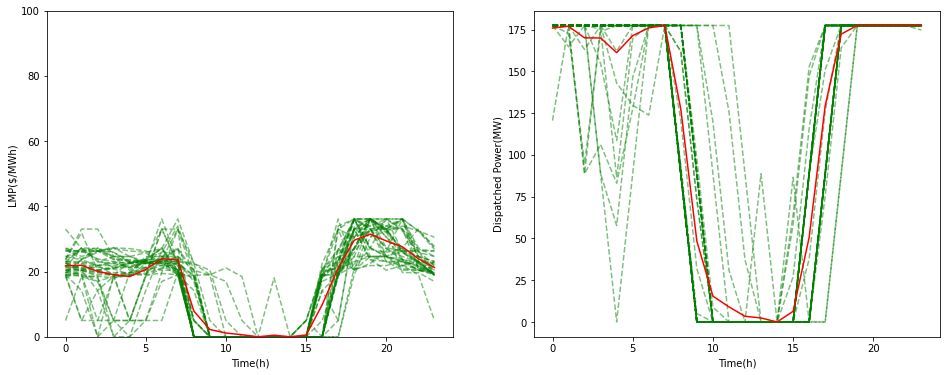

The number of days in the cluster_0 is 37


In [22]:
plot_results(0)

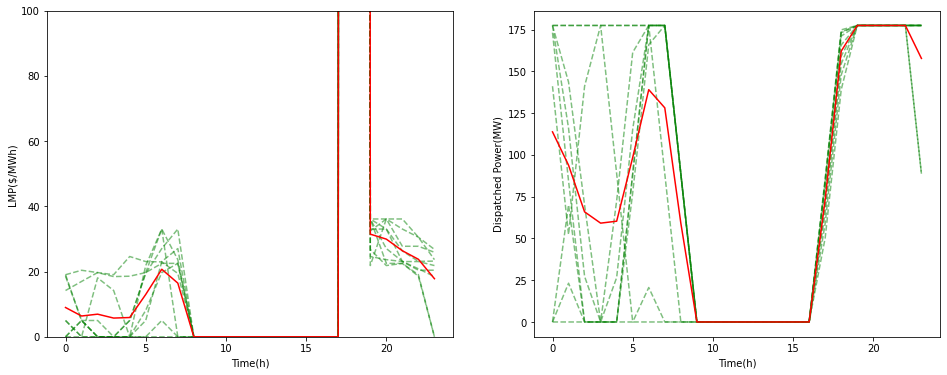

The number of days in the cluster_1 is 9


In [23]:
plot_results(1)

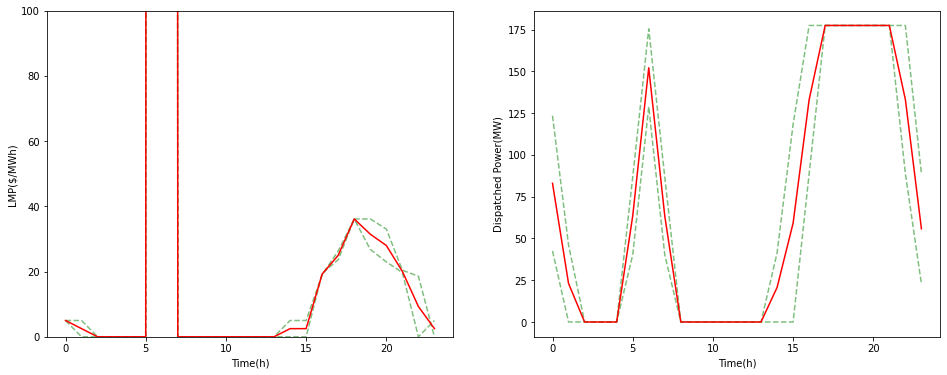

The number of days in the cluster_2 is 2


In [24]:
plot_results(2)

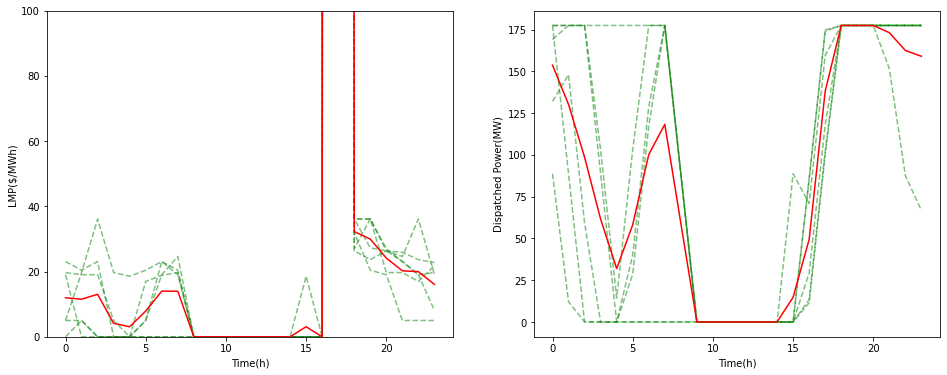

The number of days in the cluster_3 is 6


In [25]:
plot_results(3)

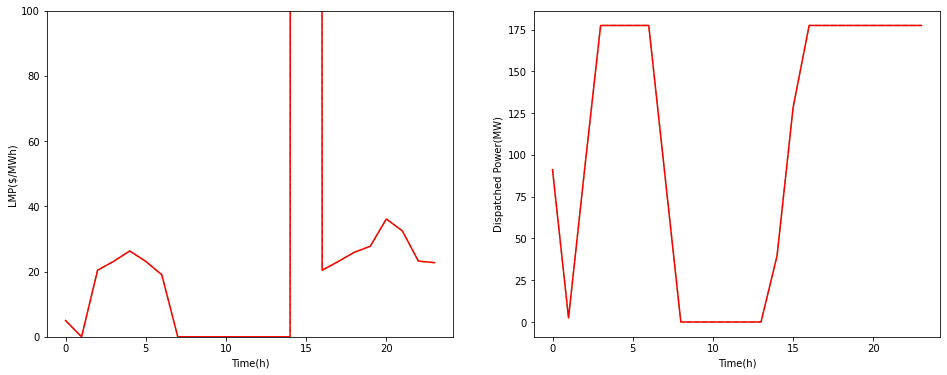

The number of days in the cluster_4 is 1


In [26]:
plot_results(4)

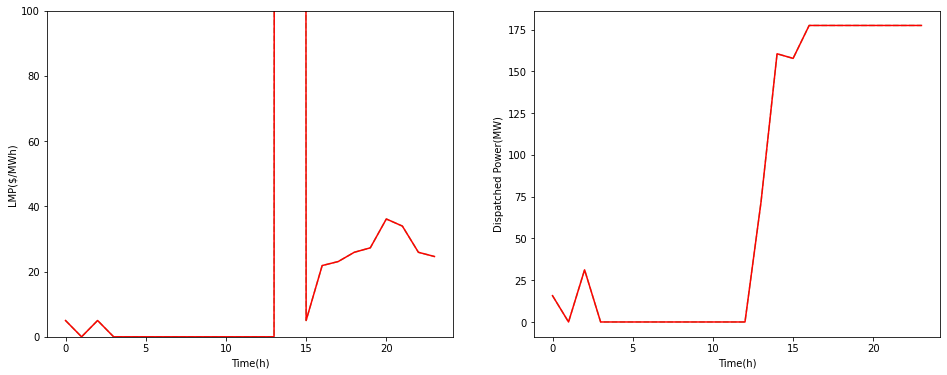

The number of days in the cluster_5 is 1


In [27]:
plot_results(5)

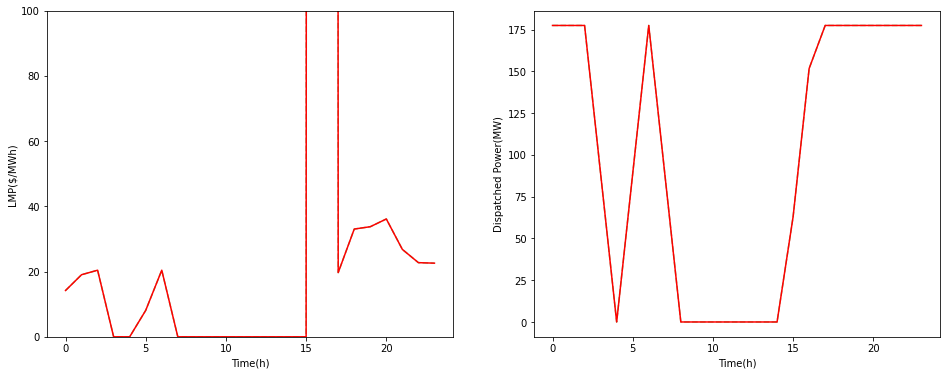

The number of days in the cluster_6 is 1


In [28]:
plot_results(6)

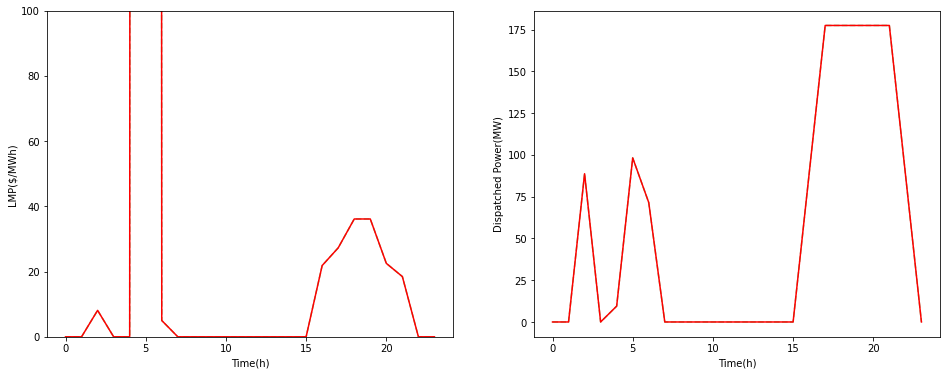

The number of days in the cluster_7 is 1


In [29]:
plot_results(7)

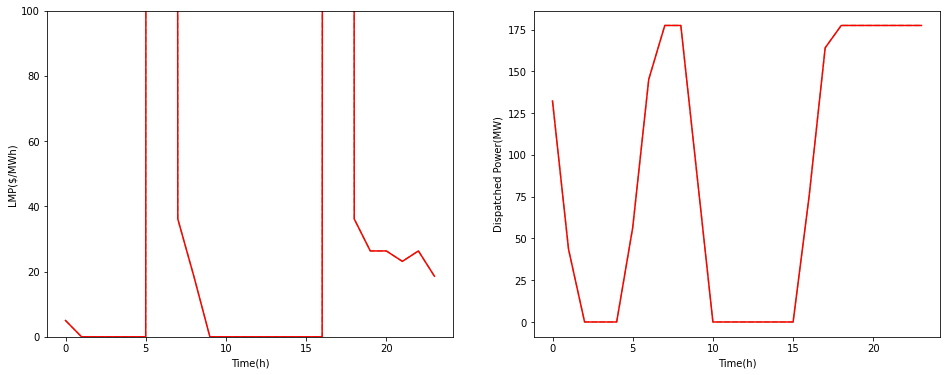

The number of days in the cluster_8 is 1


In [30]:
plot_results(8)

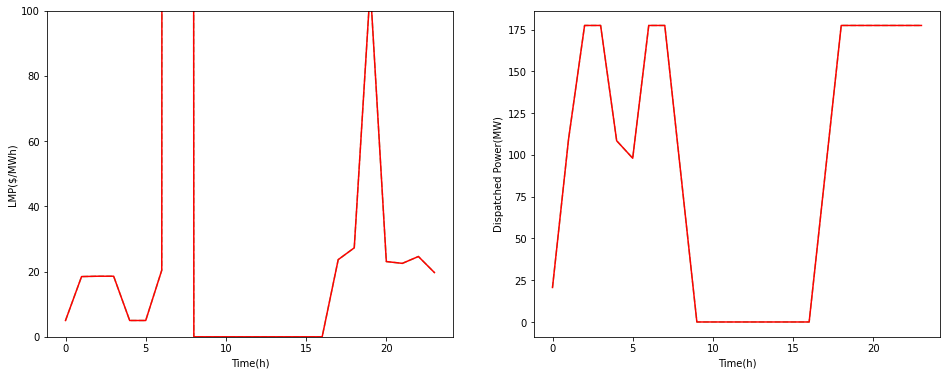

The number of days in the cluster_9 is 1


In [31]:
plot_results(9)

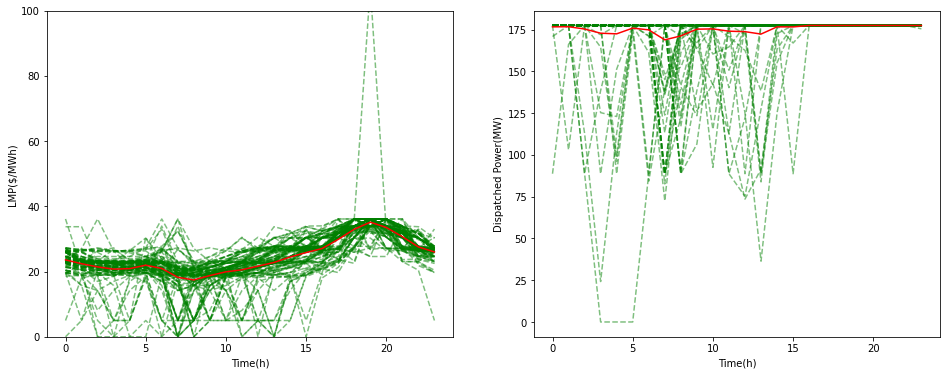

The number of days in the cluster_10 is 114


In [32]:
plot_results(10)

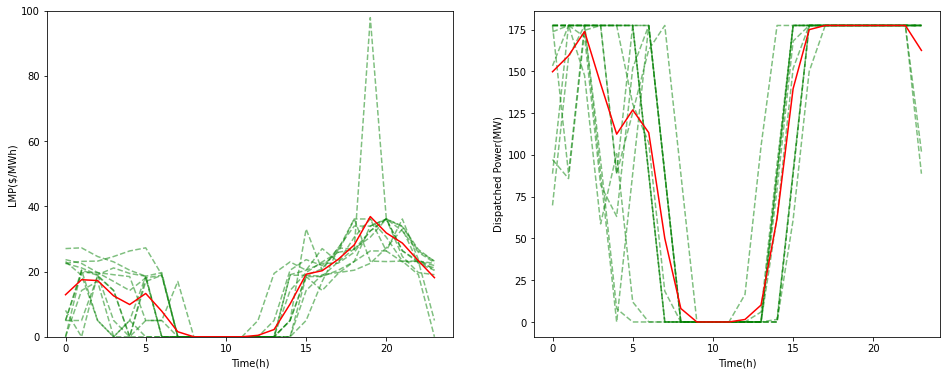

The number of days in the cluster_11 is 11


In [33]:
plot_results(11)

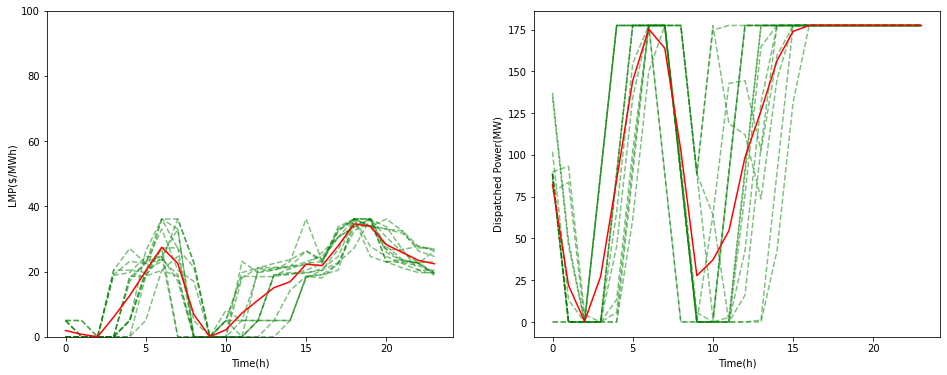

The number of days in the cluster_12 is 13


In [34]:
plot_results(12)

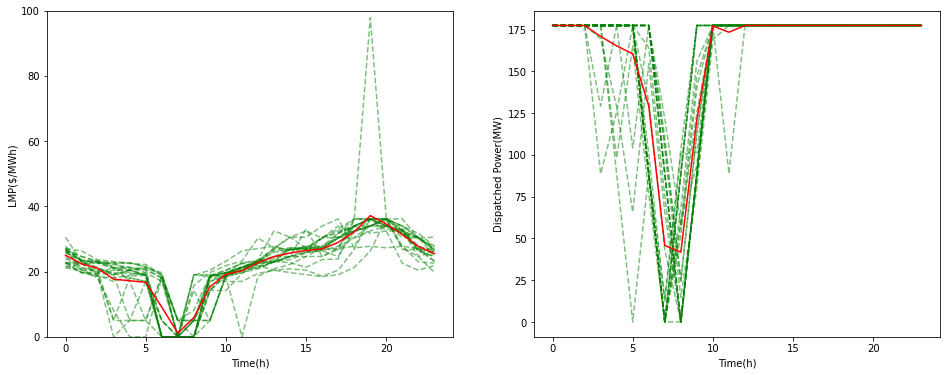

The number of days in the cluster_13 is 22


In [35]:
plot_results(13)

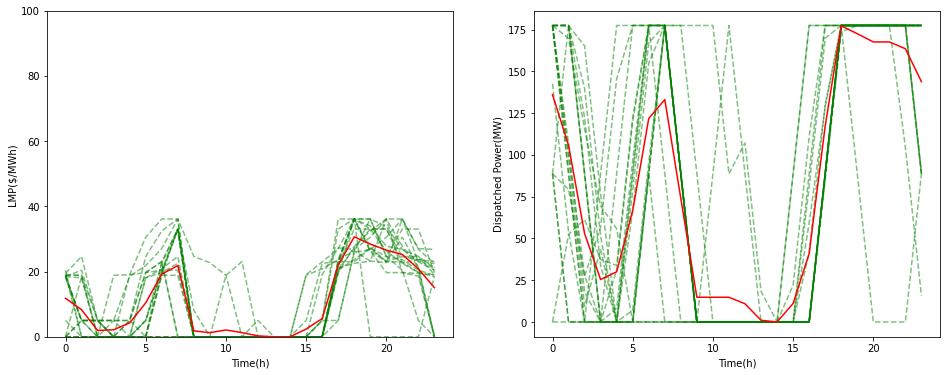

The number of days in the cluster_14 is 18


In [36]:
plot_results(14)

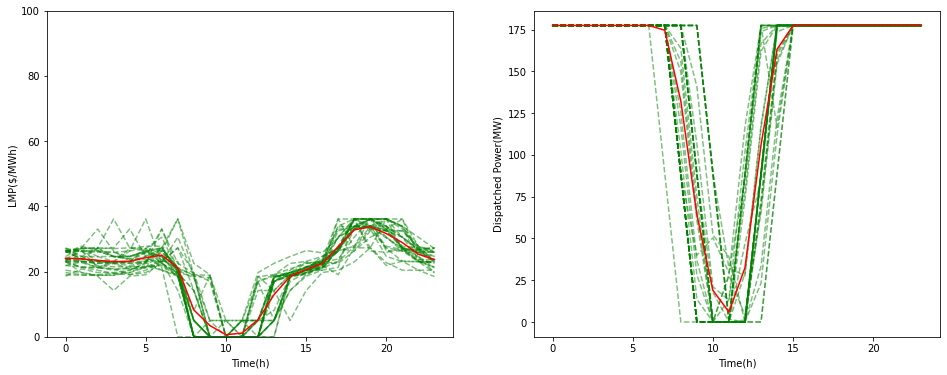

The number of days in the cluster_15 is 31


In [37]:
plot_results(15)

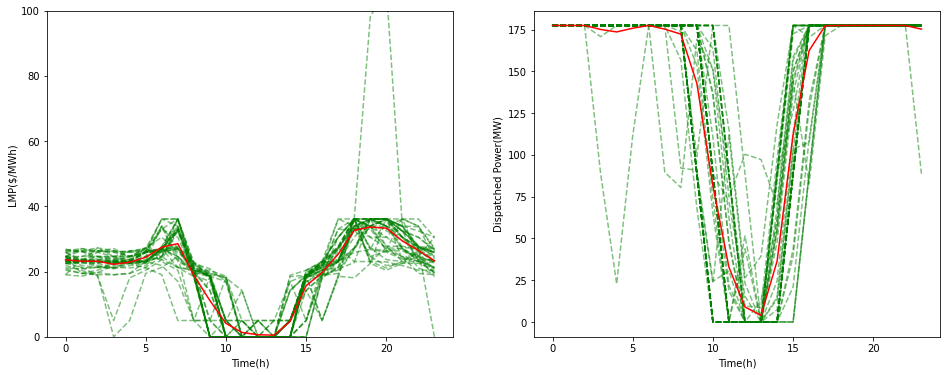

The number of days in the cluster_16 is 40


In [38]:
plot_results(16)

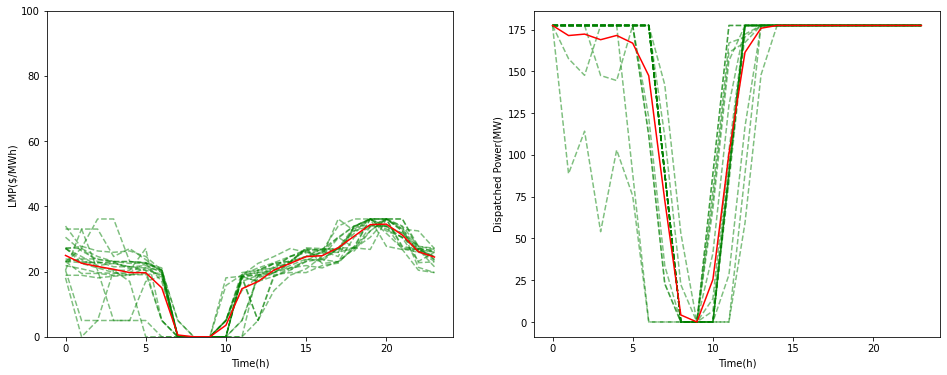

The number of days in the cluster_17 is 18


In [39]:
plot_results(17)

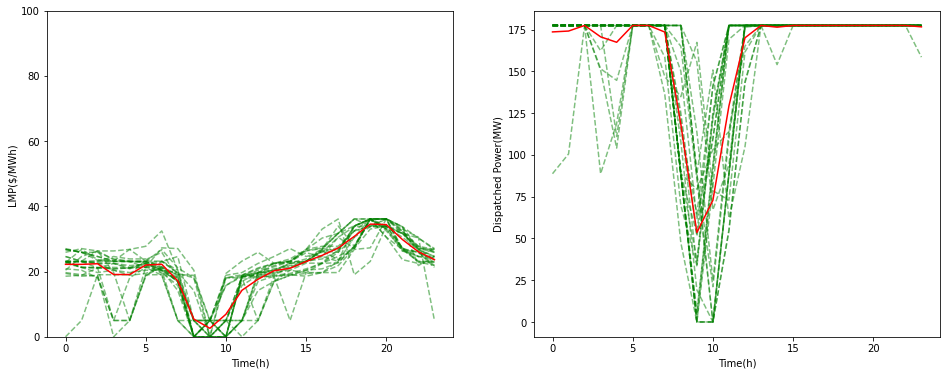

The number of days in the cluster_18 is 23


In [40]:
plot_results(18)

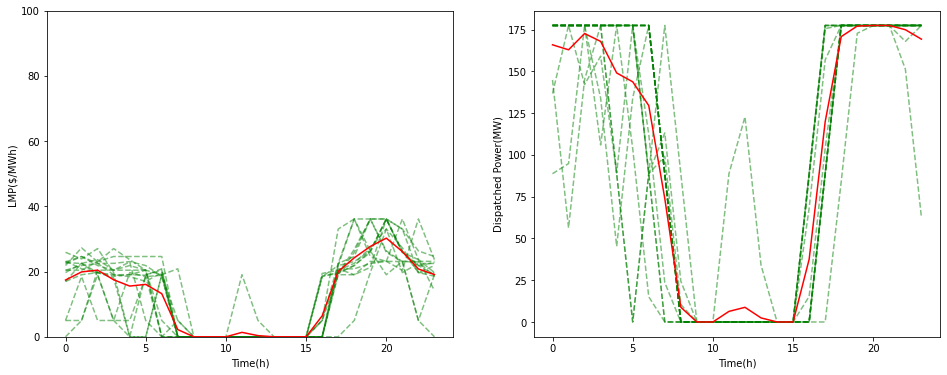

The number of days in the cluster_19 is 14


In [41]:
plot_results(19)